# Analaysis 🔍

### ❗ NOTES ❗

***Please follow the instructions for this to work properly. Since this was a Hackathon, there was no time to make this into a web app.*** 

- 1. Note the `pip installs`
- 2. If you see `run only once` do no run that cell again after the initial run all. 
- 3. If you got this far in reading direction, go ahead and hit the `Run All` button. 
- 4. blah blah more notes here 

---

In [5]:
import pandas as pd #!pip install pandas
import matplotlib.pyplot as plt #!pip install matplotlib
import seaborn as sns #!pip install seaborn

In [6]:
df = pd.read_csv("../Data/Final_Vader_Time.csv")

df.shape

/var/folders/79/jg9qrvxj5v1_ft3s9qfkpbl40000gn/T/ipykernel_83948/2125904677.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/Final_Vader_Time.csv")


(231306, 19)

<span style="color:red">**❗ ONLY RUN ONCE**</span>
In case of errors simply hit the `Restart` button and run all cells again.

🔻 ⤵️

In [7]:
df['Correct_TimeStamp'] = pd.to_datetime(df['Correct_TimeStamp'], format='mixed')
df['YearMonth'] = df['Correct_TimeStamp'].dt.to_period('M')
vader_scores_over_time = df.groupby(['YearMonth', 'Vader_Score']).size().unstack(fill_value=0)
vader_scores_over_time = vader_scores_over_time.reset_index()
vader_scores_over_time['YearMonth'] = vader_scores_over_time['YearMonth'].dt.to_timestamp()

In [8]:
filtered_data = vader_scores_over_time[
    (vader_scores_over_time['YearMonth'] >= '2022-10') & 
    (vader_scores_over_time['YearMonth'] <= '2024-02')
]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


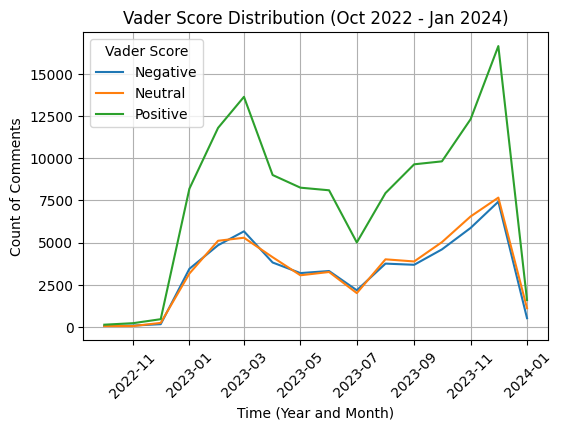

In [9]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='YearMonth', y='value', hue='Vader_Score', data=filtered_data.melt(id_vars='YearMonth'))
plt.title('Vader Score Distribution (Oct 2022 - Jan 2024)')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Count of Comments')
plt.xticks(rotation=45)
plt.legend(title='Vader Score')
plt.grid(True)
plt.show()